In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Read the datasets below**

In [ ]:
df_train = pd.read_excel("/content/train.xlsx")
df_test = pd.read_excel("/content/test.xlsx")
df_val=pd.read_excel('/content/validate.xlsx')

Reading locations.txt

In [ ]:
f = open('/content/locations.txt','r')
loc = f.read()
loc = loc.replace('"','')
loc = loc.strip('][\n').split(",")

Reading pincodes.txt

In [ ]:
f = open('/content/pincodes.txt','r')
pin= f.read()
pin = pin.replace('"','')
pin = pin.strip('][').split(",")
pin = list(map(int,pin))

Mapping location to pincode and adding pincode column to dataset 

In [ ]:
l_p=dict(zip(loc,pin))
df_train['Pincode']=df_train['Location'].map(l_p)
df_test['Pincode']=df_test['Location'].map(l_p)
df_val['Pincode']=df_val['Location'].map(l_p)

## **EDA, Data Cleaning, Data processing (Imputation, categorical variables, variable encoding, feature engineering etc)**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    810 non-null    object 
 1   Bathrooms   810 non-null    object 
 2   Facing      810 non-null    object 
 3   Furnishing  810 non-null    object 
 4   Tennants    810 non-null    object 
 5   Area        770 non-null    object 
 6   Price       810 non-null    object 
 7   Locality    810 non-null    object 
 8   Location    807 non-null    object 
 9   Pincode     799 non-null    float64
dtypes: float64(1), object(9)
memory usage: 63.4+ KB


In [ ]:
df_train.isnull().sum()

Bedrooms       0
Bathrooms      0
Facing         0
Furnishing     0
Tennants       0
Area          40
Price          0
Locality       0
Location       3
Pincode       11
dtype: int64

In [ ]:
df_test.isnull().sum()

Bedrooms      0
Bathrooms     5
Facing        5
Furnishing    0
Tennants      1
Area          6
Price         0
Locality      0
Location      0
Pincode       2
dtype: int64

Cleaning Bathrooms column

In [ ]:
def clean_bath(val):
  if type(val) is int:
    return val
  return None
df_train['Bathrooms'] = df_train['Bathrooms'].apply(clean_bath)
df_test['Bathrooms'] = df_test['Bathrooms'].apply(clean_bath)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


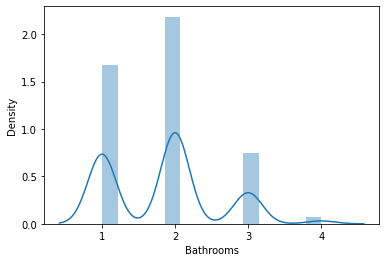

In [ ]:
sns.distplot(df_train['Bathrooms'])

In [ ]:
df_train['Bathrooms'].fillna(df_train['Bathrooms'].mean(),inplace=True)
df_test['Bathrooms'].fillna(df_test['Bathrooms'].mean(),inplace=True)
df_train['Bathrooms'] = df_train['Bathrooms'].astype(int)
df_test['Bathrooms'] = df_test['Bathrooms'].astype(int)
df_val['Bathrooms'].fillna(df_val['Bathrooms'].mean(),inplace=True)
df_val['Bathrooms'] = df_val['Bathrooms'].astype(int)

Cleaning Facing column

In [ ]:
def clean_facing(val):
  if val in ['North','East','West','South','Main Road','North - East','North - West','South - West','South - East']:
    return val
  return None
df_train['Facing']=df_train['Facing'].apply(clean_facing)
df_test['Facing']=df_test['Facing'].apply(clean_facing)
df_val['Facing']=df_val['Facing'].apply(lambda x:x.capitalize())
df_val['Facing']=df_val['Facing'].apply(clean_facing)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


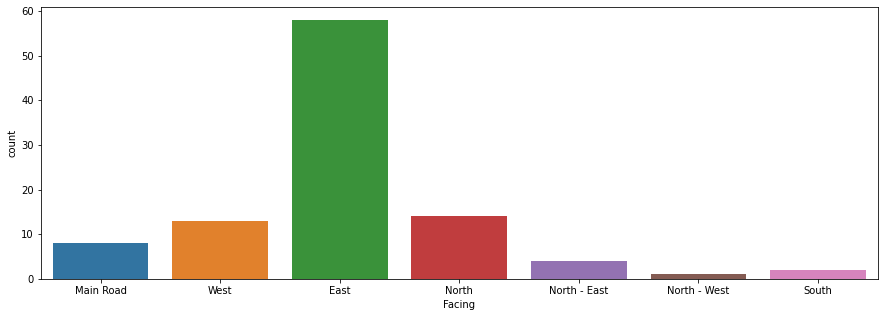

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['Facing'])

In [ ]:
df_train['Facing'].fillna(df_train['Facing'].mode()[0],inplace=True)
df_test['Facing'].fillna(df_test['Facing'].mode()[0],inplace=True)
df_val['Facing'].fillna(df_val['Facing'].mode()[0],inplace=True)

Cleaning Furnishing column

In [ ]:
def clean_furnish(val):
  if val in ['Unfurnished','Furnished','Semi-Furnished']:
    return val
  return None
df_train['Furnishing']=df_train['Furnishing'].apply(clean_furnish)
df_test['Furnishing']=df_test['Furnishing'].apply(clean_furnish)
df_val['Furnishing']=df_val['Furnishing'].apply(clean_furnish)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


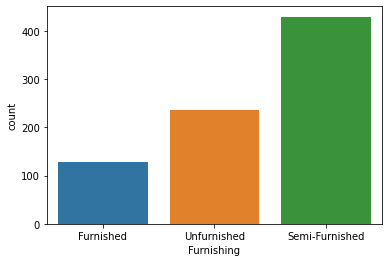

In [ ]:
sns.countplot(df_train['Furnishing'])

In [ ]:
df_train['Furnishing'].fillna(df_train['Furnishing'].mode()[0],inplace=True)
df_test['Furnishing'].fillna(df_test['Furnishing'].mode()[0],inplace=True)
df_val['Furnishing'].fillna(df_val['Furnishing'].mode()[0],inplace=True)

Cleaning Tennants column

Convert the Multi-Value Column ('Tennants') to Multiple Rows

In [ ]:
# df_train['Tennants']=df_train['Tennants'].str.split("/")
# df_train=df_train.explode('Tennants')
# df_test['Tennants']=df_test['Tennants'].str.split("/")
# df_test=df_test.explode('Tennants')

In [ ]:
def clean_ten(val):
  if val in ['Family','Bachelors','Bachelors/Family']:
    return val
  return None
df_train['Tennants']=df_train['Tennants'].apply(clean_ten)
df_test['Tennants']=df_test['Tennants'].apply(clean_ten)
df_val['Tennants']=df_val['Tennants'].apply(clean_ten)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


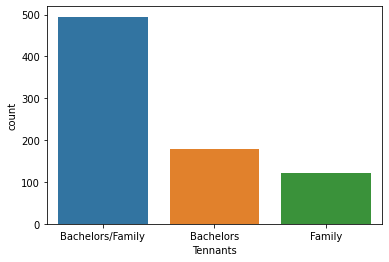

In [ ]:
sns.countplot(df_train['Tennants'])

In [ ]:
df_train['Tennants'].fillna(df_train['Tennants'].mode()[0],inplace=True)
df_test['Tennants'].fillna(df_test['Tennants'].mode()[0],inplace=True)
df_val['Tennants'].fillna(df_val['Tennants'].mode()[0],inplace=True)

Cleaning Area Column

In [ ]:
df_train['Area'].fillna('k',inplace=True)
df_test['Area'].fillna('k',inplace=True)
df_val['Area'].fillna('k',inplace=True)

In [ ]:
def clean_area(val):
  val=str(val)
  if val=='k' or val=='read more':
    return 0  
  if ',' in val:
    val=val.replace(",","")
  if val.endswith('sqyrd'):
    return int(val.strip('sqyrd'))*9
  elif val.endswith('ground'):
    return int(val.strip('ground'))*2400
  return int(val.strip('sqft'))
df_train['Area']=df_train['Area'].apply(clean_area)
df_test['Area']=df_test['Area'].apply(clean_area)
df_val['Area']=df_val['Area'].apply(clean_area)

In [ ]:
df_train['Area'].replace(0,df_train['Area'].mean(),inplace=True)
df_train['Area']=df_train['Area'].astype(int)
df_test['Area'].replace(0,df_test['Area'].mean(),inplace=True)
df_test['Area']=df_test['Area'].astype(int)
df_val['Area'].replace(0,df_val['Area'].mean(),inplace=True)
df_val['Area']=df_val['Area'].astype(int)

Cleaning Price column

In [ ]:
def clean_price(val):
  val=str(val)
  if ',' in val:
    val=val.replace(",","")
  return int(val)
  
df_train['Price']=df_train['Price'].apply(clean_price)
df_test['Price']=df_test['Price'].apply(clean_price)

Cleaning Location and Pincode

In [ ]:
df_train['Location'].fillna(df_train['Location'].mode()[0],inplace=True)
df_test['Location'].fillna(df_test['Location'].mode()[0],inplace=True)
df_val['Location'].fillna(df_val['Location'].mode()[0],inplace=True)

In [ ]:
df_train['Pincode'].fillna(df_train['Pincode'].mode()[0],inplace=True)
df_test['Pincode'].fillna(df_test['Pincode'].mode()[0],inplace=True)
df_train['Pincode']=df_train['Pincode'].astype(int)
df_test['Pincode']=df_test['Pincode'].astype(int)

In [ ]:
df_train.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Price,Locality,Location,Pincode
0,3 BHK Apartment,2,East,Furnished,Bachelors/Family,1800,35000,"Khairatabad, NH",Khairatabad,500004
1,3 BHK Apartment,2,East,Unfurnished,Bachelors,1495,23000,"SMR Vinay City, Miyapur, NH",Miyapur,500050
2,3 BHK Builder Floor,2,Main Road,Semi-Furnished,Bachelors/Family,1800,16000,"Old Malakpet, NH",Dilshuknagar,500068
3,3 BHK Apartment,2,East,Semi-Furnished,Bachelors/Family,1200,20000,Brindavan Colony-Toli Chowki,Mehdipatnam,500028
4,2 BHK Apartment,2,East,Furnished,Bachelors/Family,1050,28000,Police Colony-Kondapur,Kondapur,500032


In [ ]:
df_test.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Price,Locality,Location,Pincode
0,2 BHK Apartment,2,East,Semi-Furnished,Bachelors/Family,1200,10000,Uppal Metro,Uppal,500007
1,3 BHK Apartment,3,West,Semi-Furnished,Bachelors/Family,1834,40000,"My Home Avatar, Narsingi, Outer Ring Road",Narsingi,500032
2,2 BHK Apartment,2,East,Unfurnished,Bachelors,1493,9500,"Uppal, NH",Uppal,500007
3,2 BHK Apartment,2,East,Semi-Furnished,Bachelors/Family,1100,13000,"New Bowenpally, NH",Bowenpally,500067
4,2 BHK Apartment,2,East,Semi-Furnished,Family,1200,16000,KPHB,KPHB,500018


### Applying Label encoding

Categorical columns are encoded

In [ ]:
col=['Bedrooms','Facing','Furnishing','Tennants','Locality','Location']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in col:
  le=LabelEncoder()
  df_train[i]=le.fit_transform(df_train[i])
for j in col:
  le=LabelEncoder()
  df_test[j]=le.fit_transform(df_test[j])
for k in col:
  le=LabelEncoder()
  df_val[k]=le.fit_transform(df_val[k])

checking distribution of target

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


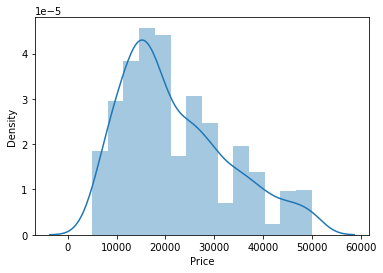

In [ ]:
sns.distplot(df_train['Price'])

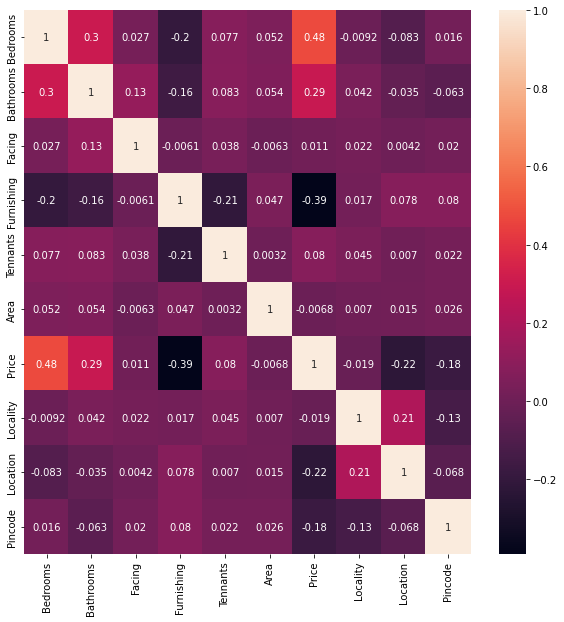

In [ ]:
a = plt.figure()
a.set_figwidth(10)
a.set_figheight(10)
sns.heatmap(df_train.corr(),annot=True)

## Visualizing and Exploring Data

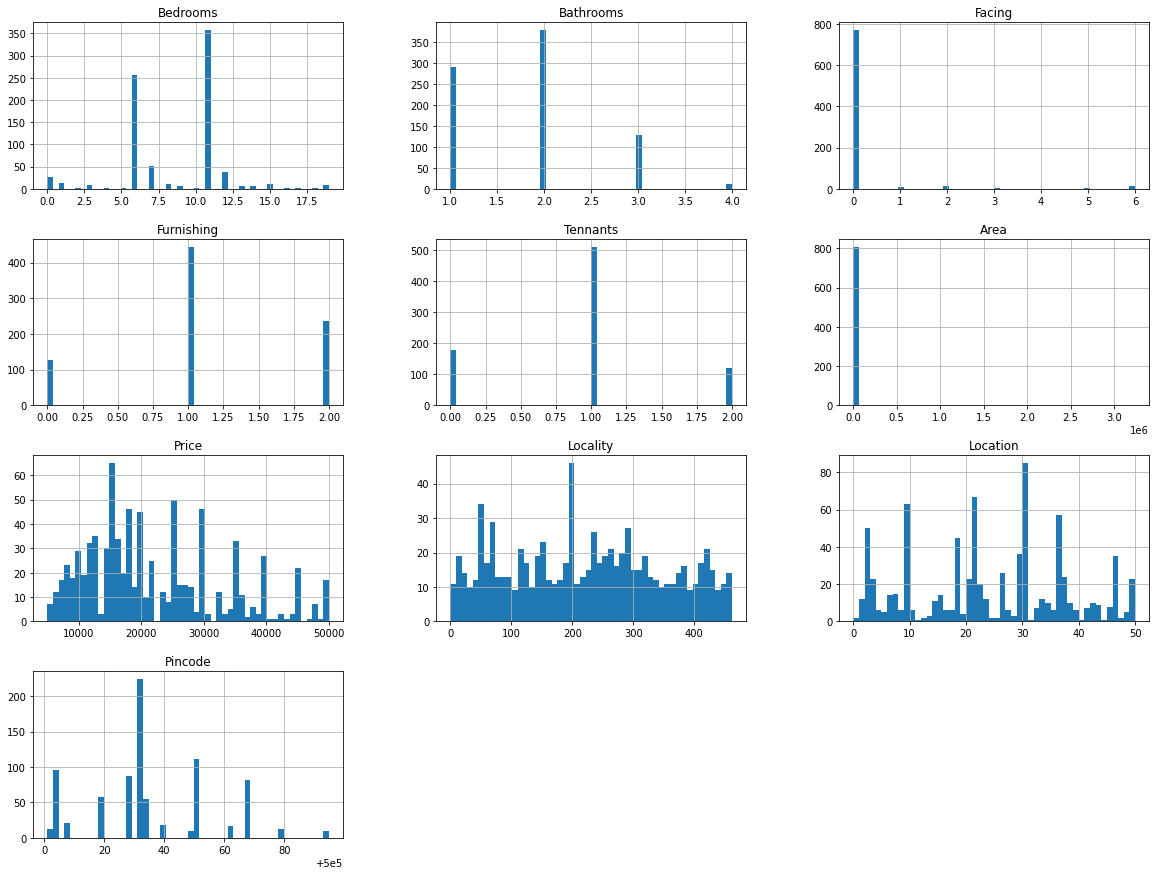

In [ ]:
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

# Feature Selection

In [ ]:
corr_matrix = df_train.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price         1.000000
Bedrooms      0.475464
Bathrooms     0.290330
Tennants      0.080429
Facing        0.011489
Area         -0.006842
Locality     -0.019335
Pincode      -0.179023
Location     -0.224529
Furnishing   -0.391622
Name: Price, dtype: float64

Chi-Square test

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
X = df_train.drop('Price',axis=1)
y = df_train['Price']

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
chi_scores

(array([3.50380134e+02, 4.73632150e+01, 2.96938779e+02, 7.39556165e+01,
        2.84065506e+01, 4.09021069e+07, 5.49803772e+03, 7.73869807e+02,
        8.63686742e-02]),
 array([6.57742854e-039, 9.82651355e-001, 9.95178083e-030, 3.50365056e-001,
        9.99997686e-001, 0.00000000e+000, 0.00000000e+000, 3.20373255e-119,
        1.00000000e+000]))

here first array represents chi square values and second array represnts p-values

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

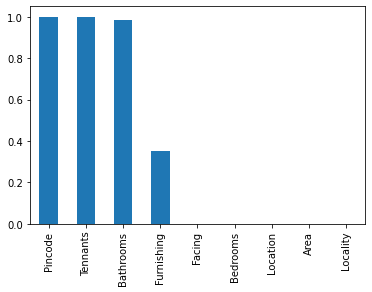

In [ ]:
p_values.plot.bar()

## Since Tennants,Pincode,Bathrooms has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training

## Based on Correlation, and Chi-Squared test, these are the selected features:


*   Furnishing
*   Facing
*   Bedrooms
*   Location
*   Area
*   Locality









In [ ]:
X_train = df_train.drop(['Price','Tennants','Pincode','Bathrooms'],axis=1)
Y_train = df_train['Price']
X_test = df_test.drop(['Price','Tennants','Pincode','Bathrooms'],axis=1)
Y_test = df_test['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train_s=s.fit_transform(X_train)
X_test_s=s.fit_transform(X_test)


# **Model training ( any ML model)**

Use train dataset only

### When the target variable is continuous, regression models are commonly used to make predictions. Some popular regression models include:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest regressor
4. SVR

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_s, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error  
Y_pred = lin_reg.predict(X_test_s) 
lin_mse = mean_squared_error(Y_test,Y_pred)
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

8983.597295572321

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train_s, Y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [  9268.64358553   8168.55043966   9937.46903636   9404.24281106
 101865.11879359   8035.94667848   9915.14960515   7981.84728534
   9655.60470861   8419.87424209]
Mean: 18265.24471858553
Standard deviation: 27876.25930029383


### The RMSE tells us that model has typical prediction error of 8983 which is pretty big.we will try more complex models.

# Decision Tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_s, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
Y_pred = tree_reg.predict(X_test_s)
tree_mse = mean_squared_error(Y_test,Y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

12367.595892529782

In [ ]:
scores = cross_val_score(tree_reg,X_train_s, Y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [ 9792.98690863  7985.39562012 10381.46645128  9940.05489713
  8688.93861878  8426.86034705 11036.38451961  9442.67303649
  9283.49125472  8118.85665185]
Mean: 9309.710830567572
Standard deviation: 954.779845302633


## Now, we can see that linear regression was even better than decision tree

# SVR

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_s, Y_train)
Y_pred = svm_reg.predict(X_test_s)
svm_mse = mean_squared_error(Y_test,Y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

10678.15887453596

In [ ]:
svr_scores = cross_val_score(svm_reg,X_train_s, Y_train,scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [11679.70891782 10071.44634842 11579.99627713 12579.97165095
 10070.71140464 10607.09199905 10916.5705215   9996.30653885
 12538.34906141 10630.29143491]
Mean: 11067.044415468026
Standard deviation: 929.9188109739


### The svm performed badly in cv

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_s, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_pred = forest_reg.predict(X_test_s) 
forest_mse = mean_squared_error(Y_test, Y_pred) 
forest_rmse = np.sqrt(forest_mse) 
forest_rmse

9789.320889257886

In [ ]:
forest_scores = cross_val_score(forest_reg,X_train_s, Y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [7309.07558636 6954.5386292  7891.39548908 7105.2797155  6655.85791828
 6291.75114298 7478.61016317 7567.45512615 7263.80044419 6473.08518329]
Mean: 7099.084939818931
Standard deviation: 482.02064899490523


# **Best model which has mean error of 7099 with standard deviation of +- 482**

# **Model selection**

Select the best model and save the model as a pickle file

## Finally the best model is RandomForest

---
## Hyperparameter Tuning


In [ ]:
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = forest_reg,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train_s, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



In [ ]:
forest_reg = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
forest_reg.fit( X_train_s, Y_train) 
Y_pred = forest_reg.predict(X_test_s) 
forest_mse = mean_squared_error(Y_test, Y_pred) 
forest_rmse = np.sqrt(forest_mse) 
forest_rmse

8642.183086266374

In [ ]:
forest_scores = cross_val_score(forest_reg,X_train_s, Y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [7167.35099819 6613.87876462 7533.68656647 6574.75584485 6648.63500307
 6067.34131749 6909.32845035 6930.44539519 7543.84451442 6353.82253013]
Mean: 6834.308938477569
Standard deviation: 456.93495812612156


## so this is our final model and we will be deploying this random forest model

saving as pickel file

In [ ]:
import pandas as pd
import pickle

pickle.dump(forest_reg, open('model.pkl', 'wb'))

**Model Validation**

Write a function (predict_rent) which completes all pre-processing steps required to predict the rent of a house, using the pickle file (trained model)

Input : validate dataframe / array

Output : Price dataframe ,expected output shape (147,1)

Save the output as following yourname_validate_prices.csv


In [ ]:
X_val=df_val.drop(['Pincode','Tennants','Bathrooms'],axis=1)

In [ ]:
def predict_rent(df):
  pickled_model = pickle.load(open('model.pkl', 'rb'))
  l = pickled_model.predict(df)
  return l

In [ ]:
l = predict_rent(X_val)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
out=pd.DataFrame(l,columns=['Price'])

In [ ]:
out.to_csv('koushik_validate_prices.csv')

In [ ]:
out.shape

(147, 1)